In [1]:
from sklearn.cluster import KMeans # use kmeans algorithm in sklearn library
import pandas as pd # use pandas to read and write csv file
from sklearn.preprocessing import MinMaxScaler # scale the data to format 0-1
from matplotlib import pyplot as plt # draw plot
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df #print df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
scaler = MinMaxScaler() # a MinMaxScaler object to scale data to format 0-1

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959
...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918
196,197,Female,45,0.909836,0.275510
197,198,Male,32,0.909836,0.744898
198,199,Male,32,1.000000,0.173469


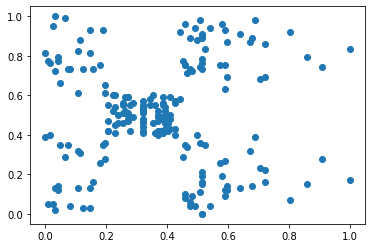

In [ ]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])


In [ ]:
y_predicted

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted


In [ ]:
km.cluster_centers_

array([[0.46737705, 0.1577551 ],
       [0.25631369, 0.5426549 ],
       [0.58638083, 0.82783883]])

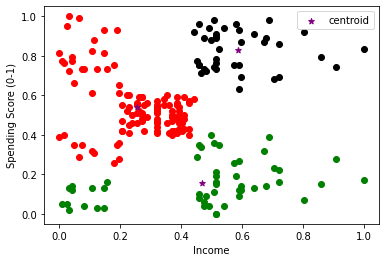

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Income')
plt.ylabel('Spending Score (0-1)')
plt.legend()

In [ ]:
numOfgroupElements = [0,0,0,0,0] #print object number of each group
for i in range(len(y_predicted)):
  if y_predicted[i] == 0:
    numOfgroupElements[0] = numOfgroupElements[0]+1
  if y_predicted[i] == 1:
    numOfgroupElements[1] = numOfgroupElements[1]+1
  if y_predicted[i] == 2:
    numOfgroupElements[2] = numOfgroupElements[2]+1
  if y_predicted[i] == 3:
    numOfgroupElements[3] = numOfgroupElements[3]+1
  if y_predicted[i] == 4:
    numOfgroupElements[4] = numOfgroupElements[4]+1
for i in range(len(numOfgroupElements)):
  print(numOfgroupElements[i])

50
111
39
0
0


In [4]:
sse = [] 
k_rng = range(1,21)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

In [9]:
sse[5]

3.100666377684788

In [10]:
sse

[23.040720326039906,
 13.993505283127977,
 9.058985215159453,
 6.110312266413655,
 3.5831179059525606,
 3.100666377684788,
 2.682840877112165,
 2.2168818321158827,
 1.896866943227005,
 1.638784374641233,
 1.4424527553074897,
 1.3150940964143025,
 1.1654371475358067,
 1.0746338954711838,
 0.9974127128212675,
 0.9044193540501833,
 0.832729407777394,
 0.770028701244958,
 0.7011725227376906,
 0.66854757727163]

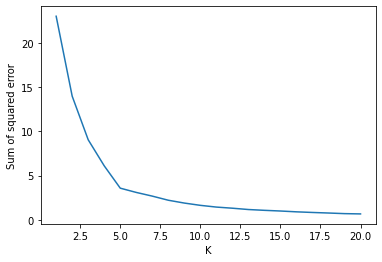

In [6]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])

In [ ]:
y_predicted

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4,
       2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 0, 3, 4, 3, 0, 3, 0, 3,
       4, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [ ]:
df['cluster']=y_predicted

In [ ]:
km.cluster_centers_

array([[0.6       , 0.16443149],
       [0.08792846, 0.79962894],
       [0.09265859, 0.20319432],
       [0.58638083, 0.82783883],
       [0.33029751, 0.49508692]])

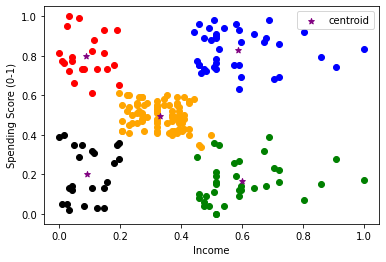

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='black')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='blue')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Income')
plt.ylabel('Spending Score (0-1)')
plt.legend()